In [89]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('HistoricalData_1737017324791.csv')

# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
         Date  Close/Last     Open     High      Low
0  01/15/2025     5949.91  5905.21  5960.61  5905.21
1  01/14/2025     5842.91  5859.27  5871.92  5805.42
2  01/13/2025     5836.22  5782.02  5838.61  5773.31
3  01/10/2025     5827.04  5890.35  5890.35  5807.78
4  01/08/2025     5918.25  5910.66  5927.89  5874.78


In [90]:
# Memeriksa informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2523 non-null   object 
 1   Close/Last  2523 non-null   float64
 2   Open        2523 non-null   float64
 3   High        2523 non-null   float64
 4   Low         2523 non-null   float64
dtypes: float64(4), object(1)
memory usage: 98.7+ KB
None

Missing Values:
Date          0
Close/Last    0
Open          0
High          0
Low           0
dtype: int64


In [91]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
        Close/Last         Open         High          Low
count  2523.000000  2523.000000  2523.000000  2523.000000
mean   3366.339160  3359.331352  3377.148165  3340.130749
std    1092.187568  1105.951796  1111.498996  1100.153704
min    1829.080000     0.000000     0.000000     0.000000
25%    2433.470000  2433.950000  2442.850000  2422.575000
50%    3007.390000  3010.730000  3019.590000  2996.820000
75%    4218.295000  4221.475000  4246.605000  4196.820000
max    6090.270000  6089.030000  6099.970000  6079.980000


In [92]:
# Memeriksa format tanggal
print("\nTipe Data Kolom 'Date':")
print(df['Date'].dtype)

# Mengubah kolom 'Date' ke tipe datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Memeriksa perubahan
print("\nTipe Data Kolom 'Date' Setelah Konversi:")
print(df['Date'].dtype)

# Menampilkan 5 baris pertama setelah konversi
print("\n5 Baris Pertama Setelah Konversi 'Date':")
print(df.head())


Tipe Data Kolom 'Date':
object

Tipe Data Kolom 'Date' Setelah Konversi:
datetime64[ns]

5 Baris Pertama Setelah Konversi 'Date':
        Date  Close/Last     Open     High      Low
0 2025-01-15     5949.91  5905.21  5960.61  5905.21
1 2025-01-14     5842.91  5859.27  5871.92  5805.42
2 2025-01-13     5836.22  5782.02  5838.61  5773.31
3 2025-01-10     5827.04  5890.35  5890.35  5807.78
4 2025-01-08     5918.25  5910.66  5927.89  5874.78


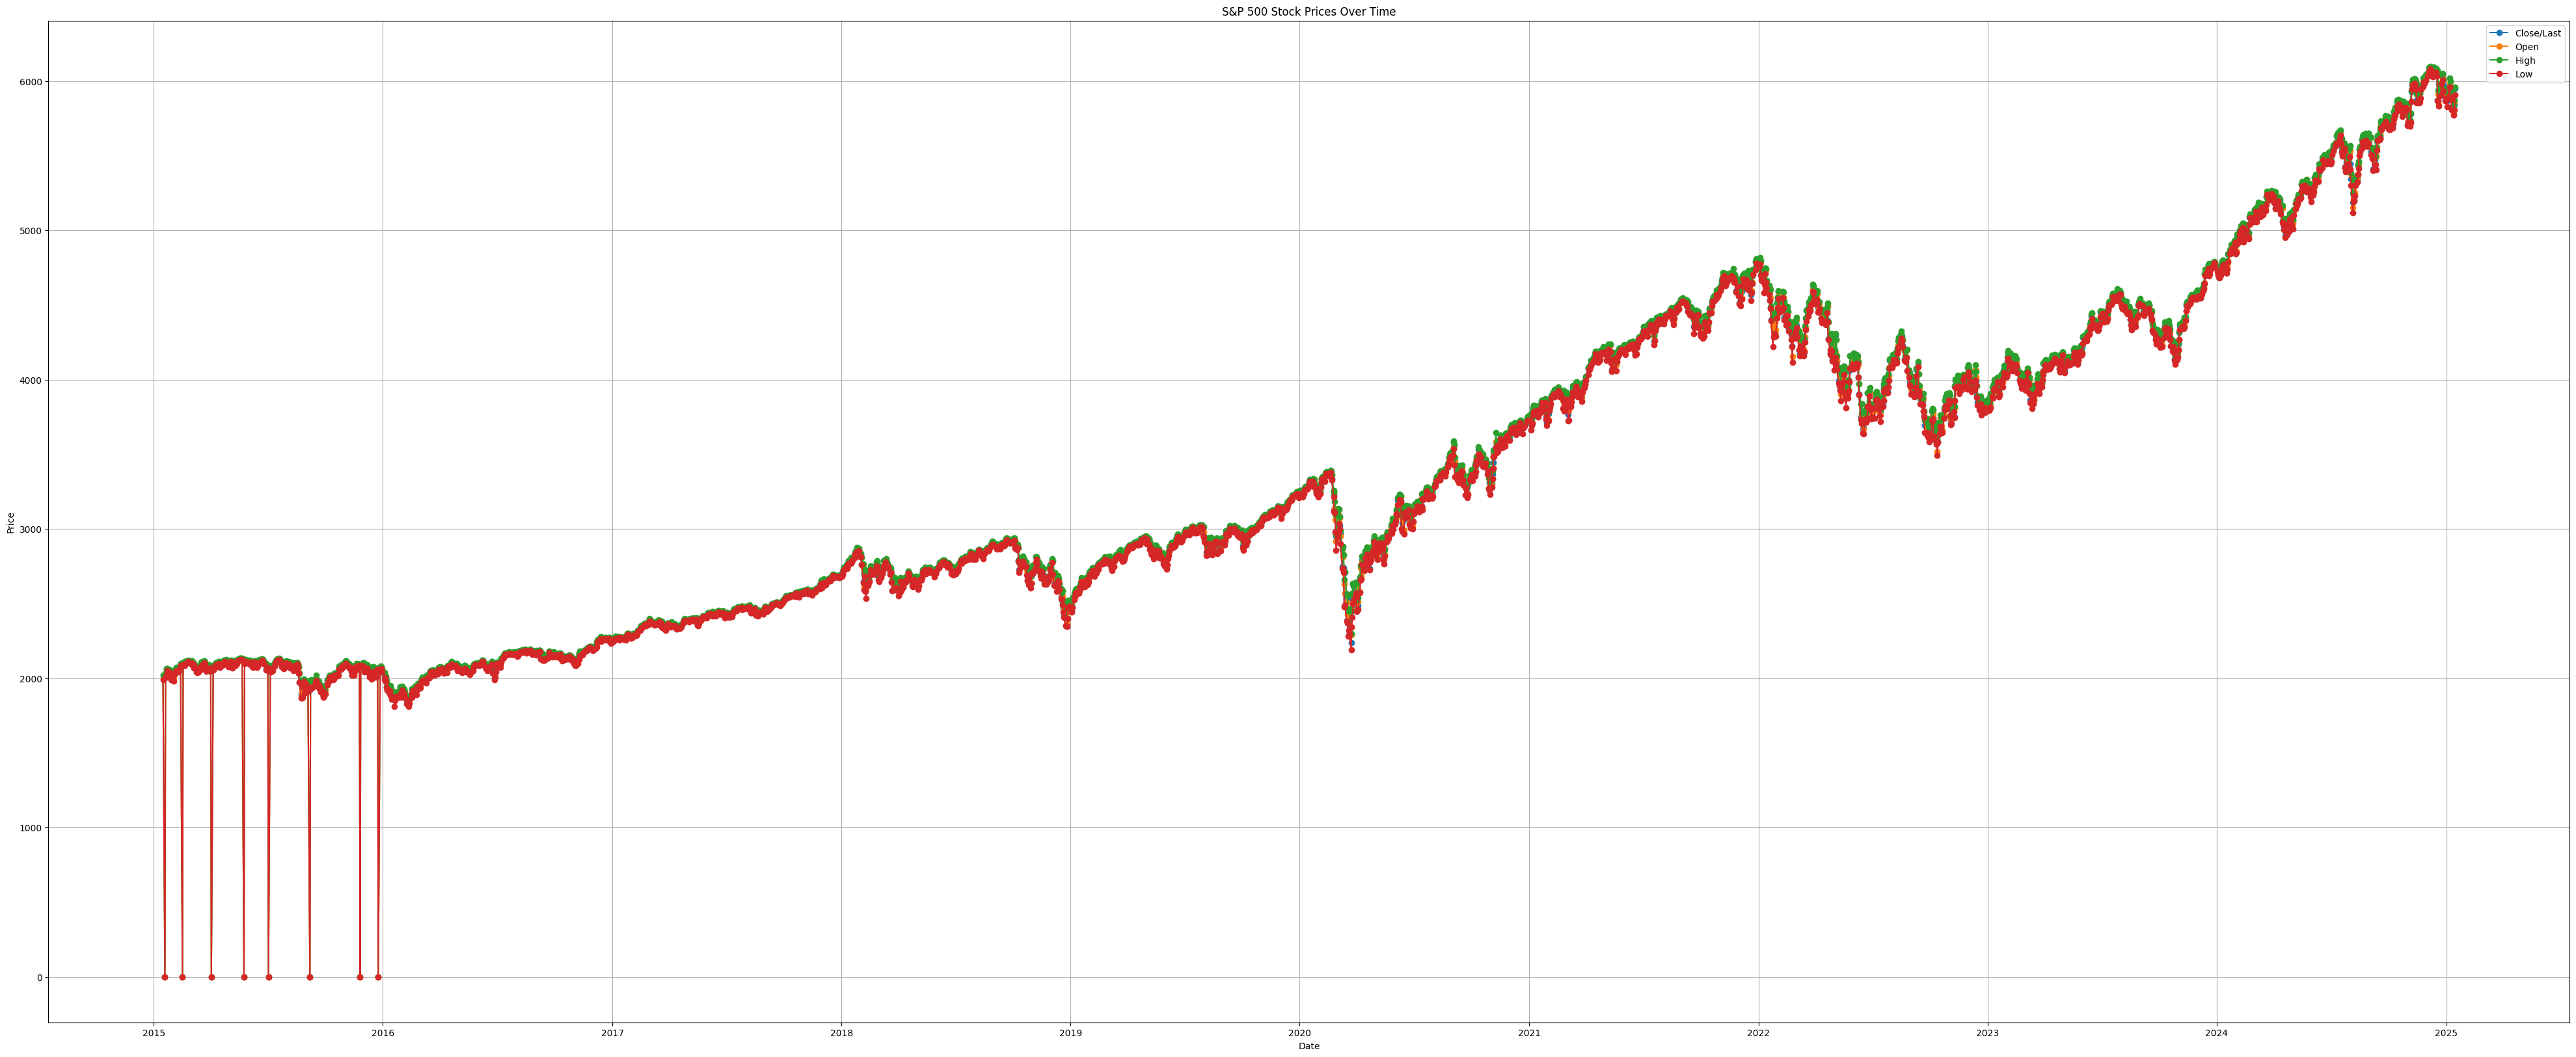

In [93]:
import matplotlib.pyplot as plt

# Plot harga penutupan (Close/Last) dari waktu ke waktu
plt.figure(figsize=(50, 20))
plt.plot(df['Date'], df['Close/Last'], marker='o', label='Close/Last')
plt.plot(df['Date'], df['Open'], marker='o', label='Open')
plt.plot(df['Date'], df['High'], marker='o', label='High')
plt.plot(df['Date'], df['Low'], marker='o', label='Low')
plt.title('S&P 500 Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

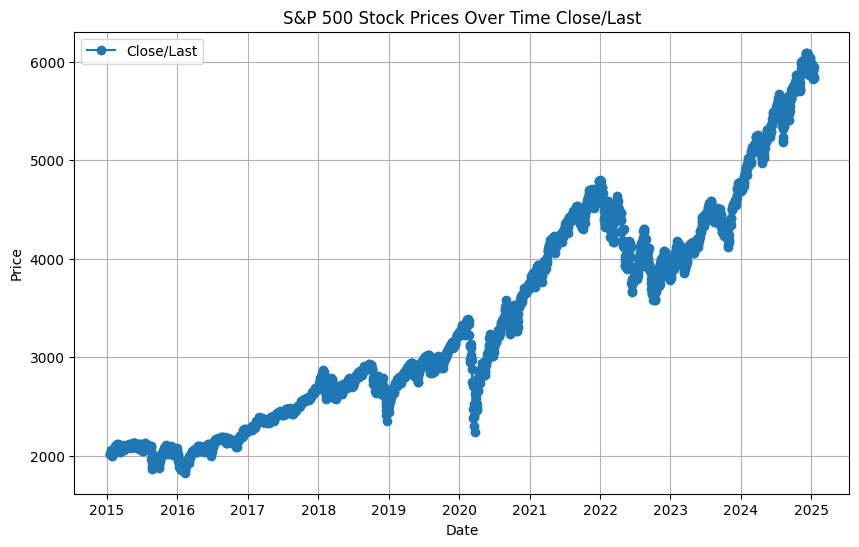

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close/Last'], marker='o', label='Close/Last')
plt.title('S&P 500 Stock Prices Over Time Close/Last')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

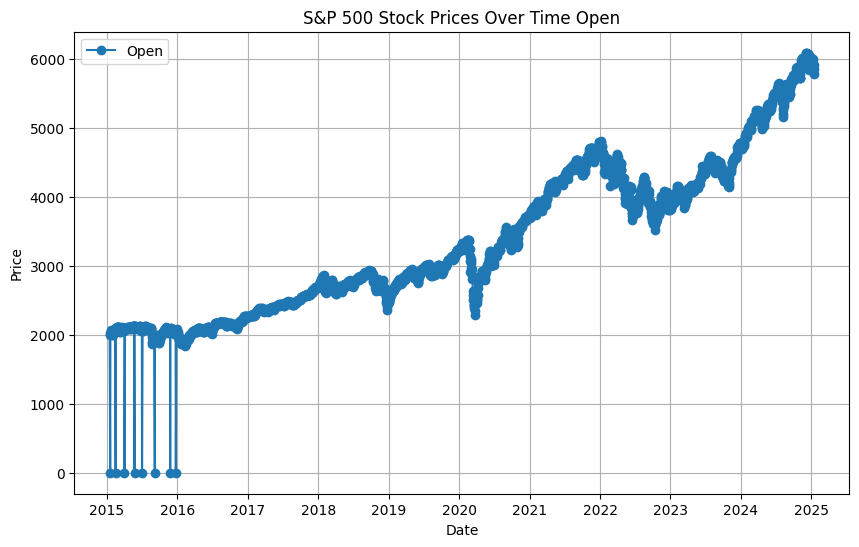

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], marker='o', label='Open')
plt.title('S&P 500 Stock Prices Over Time Open')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

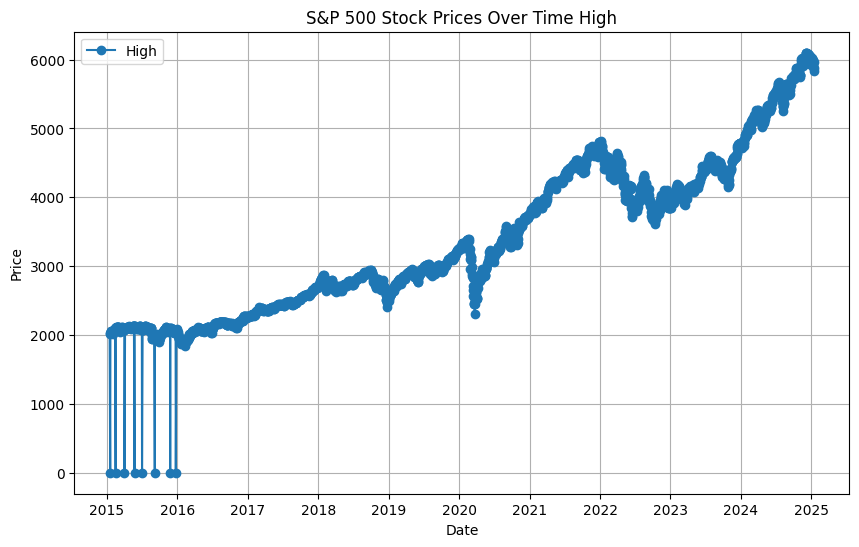

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], marker='o', label='High')
plt.title('S&P 500 Stock Prices Over Time High')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

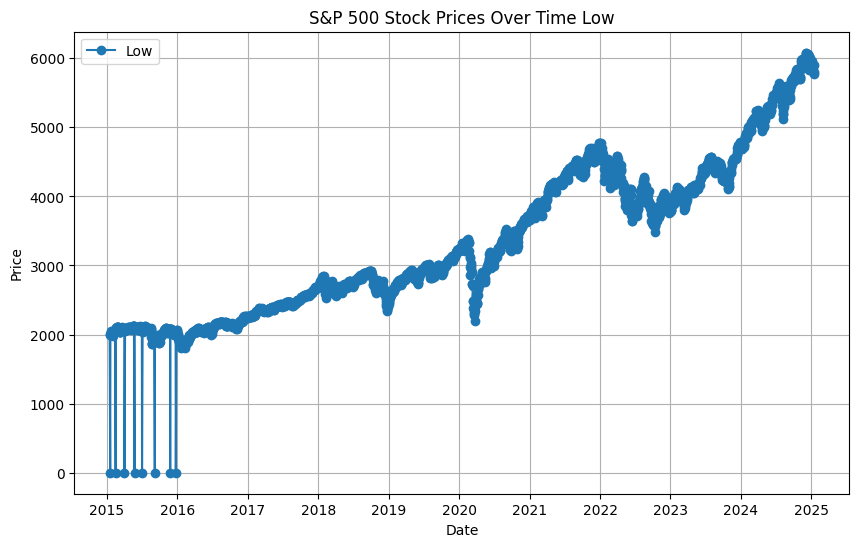

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Low'], marker='o', label='Low')
plt.title('S&P 500 Stock Prices Over Time Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

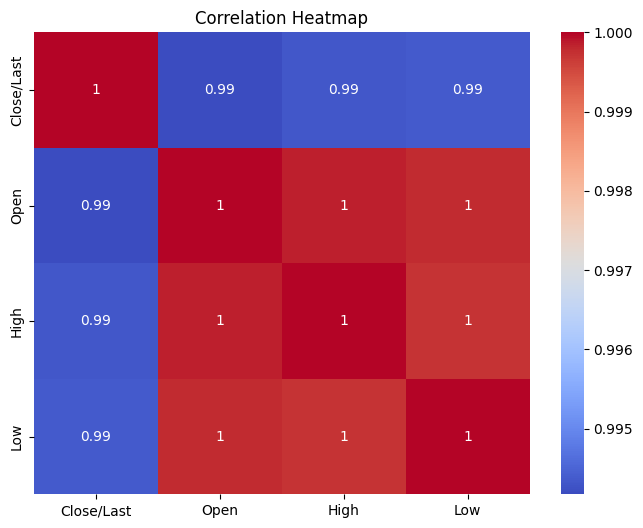

In [98]:
import seaborn as sns

# Heatmap korelasi
corr = df[['Close/Last', 'Open', 'High', 'Low']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

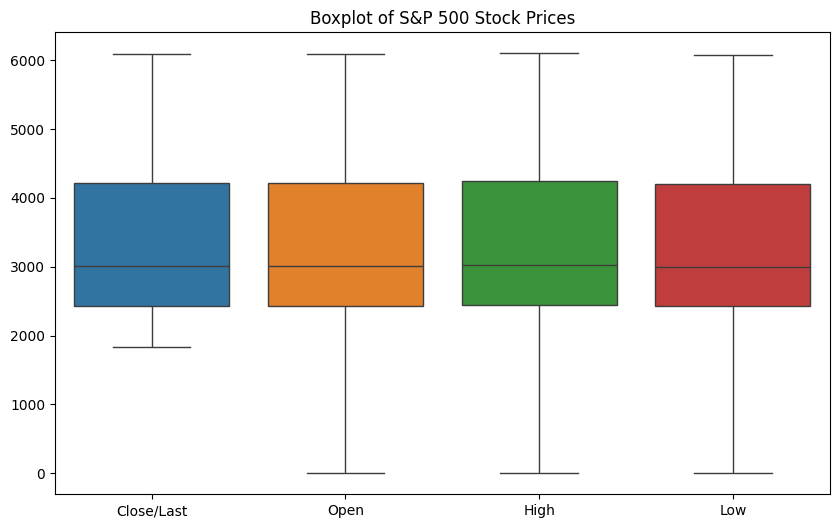

In [99]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Close/Last', 'Open', 'High', 'Low']])
plt.title('Boxplot of S&P 500 Stock Prices')
plt.show()

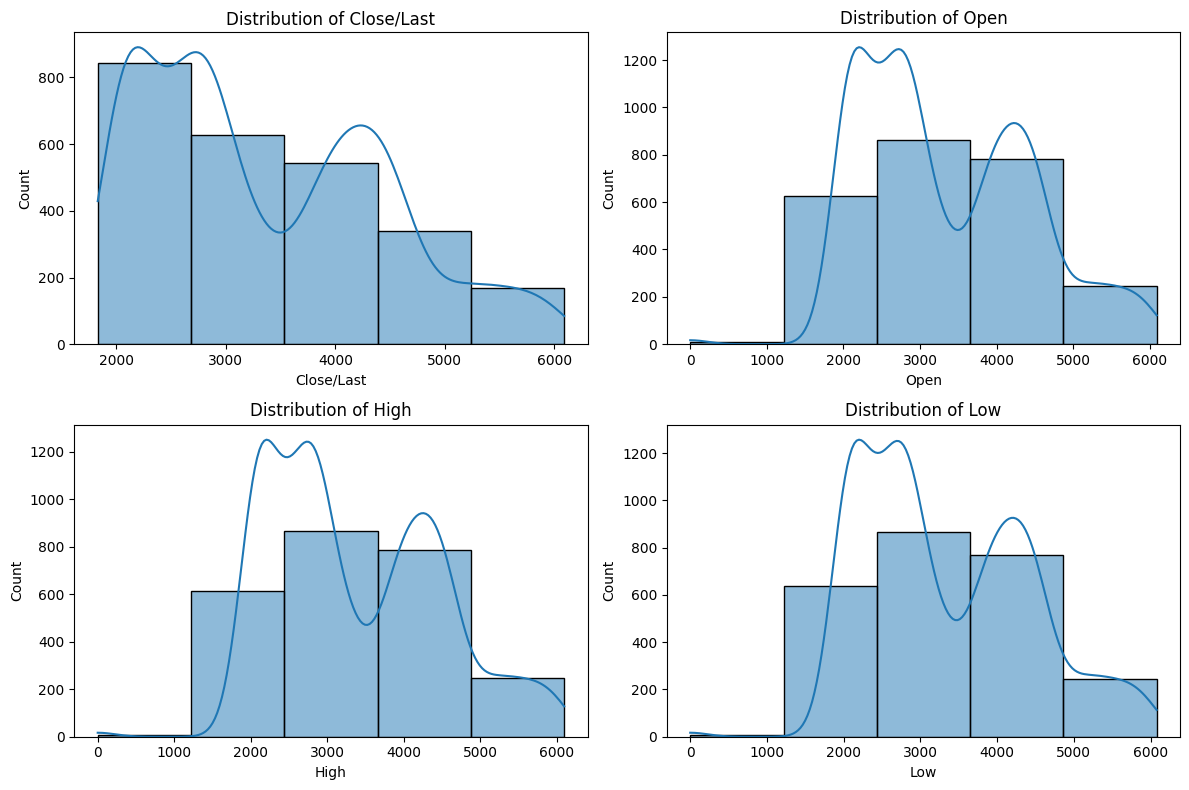

In [100]:
# Histogram untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Close/Last', 'Open', 'High', 'Low'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=5)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

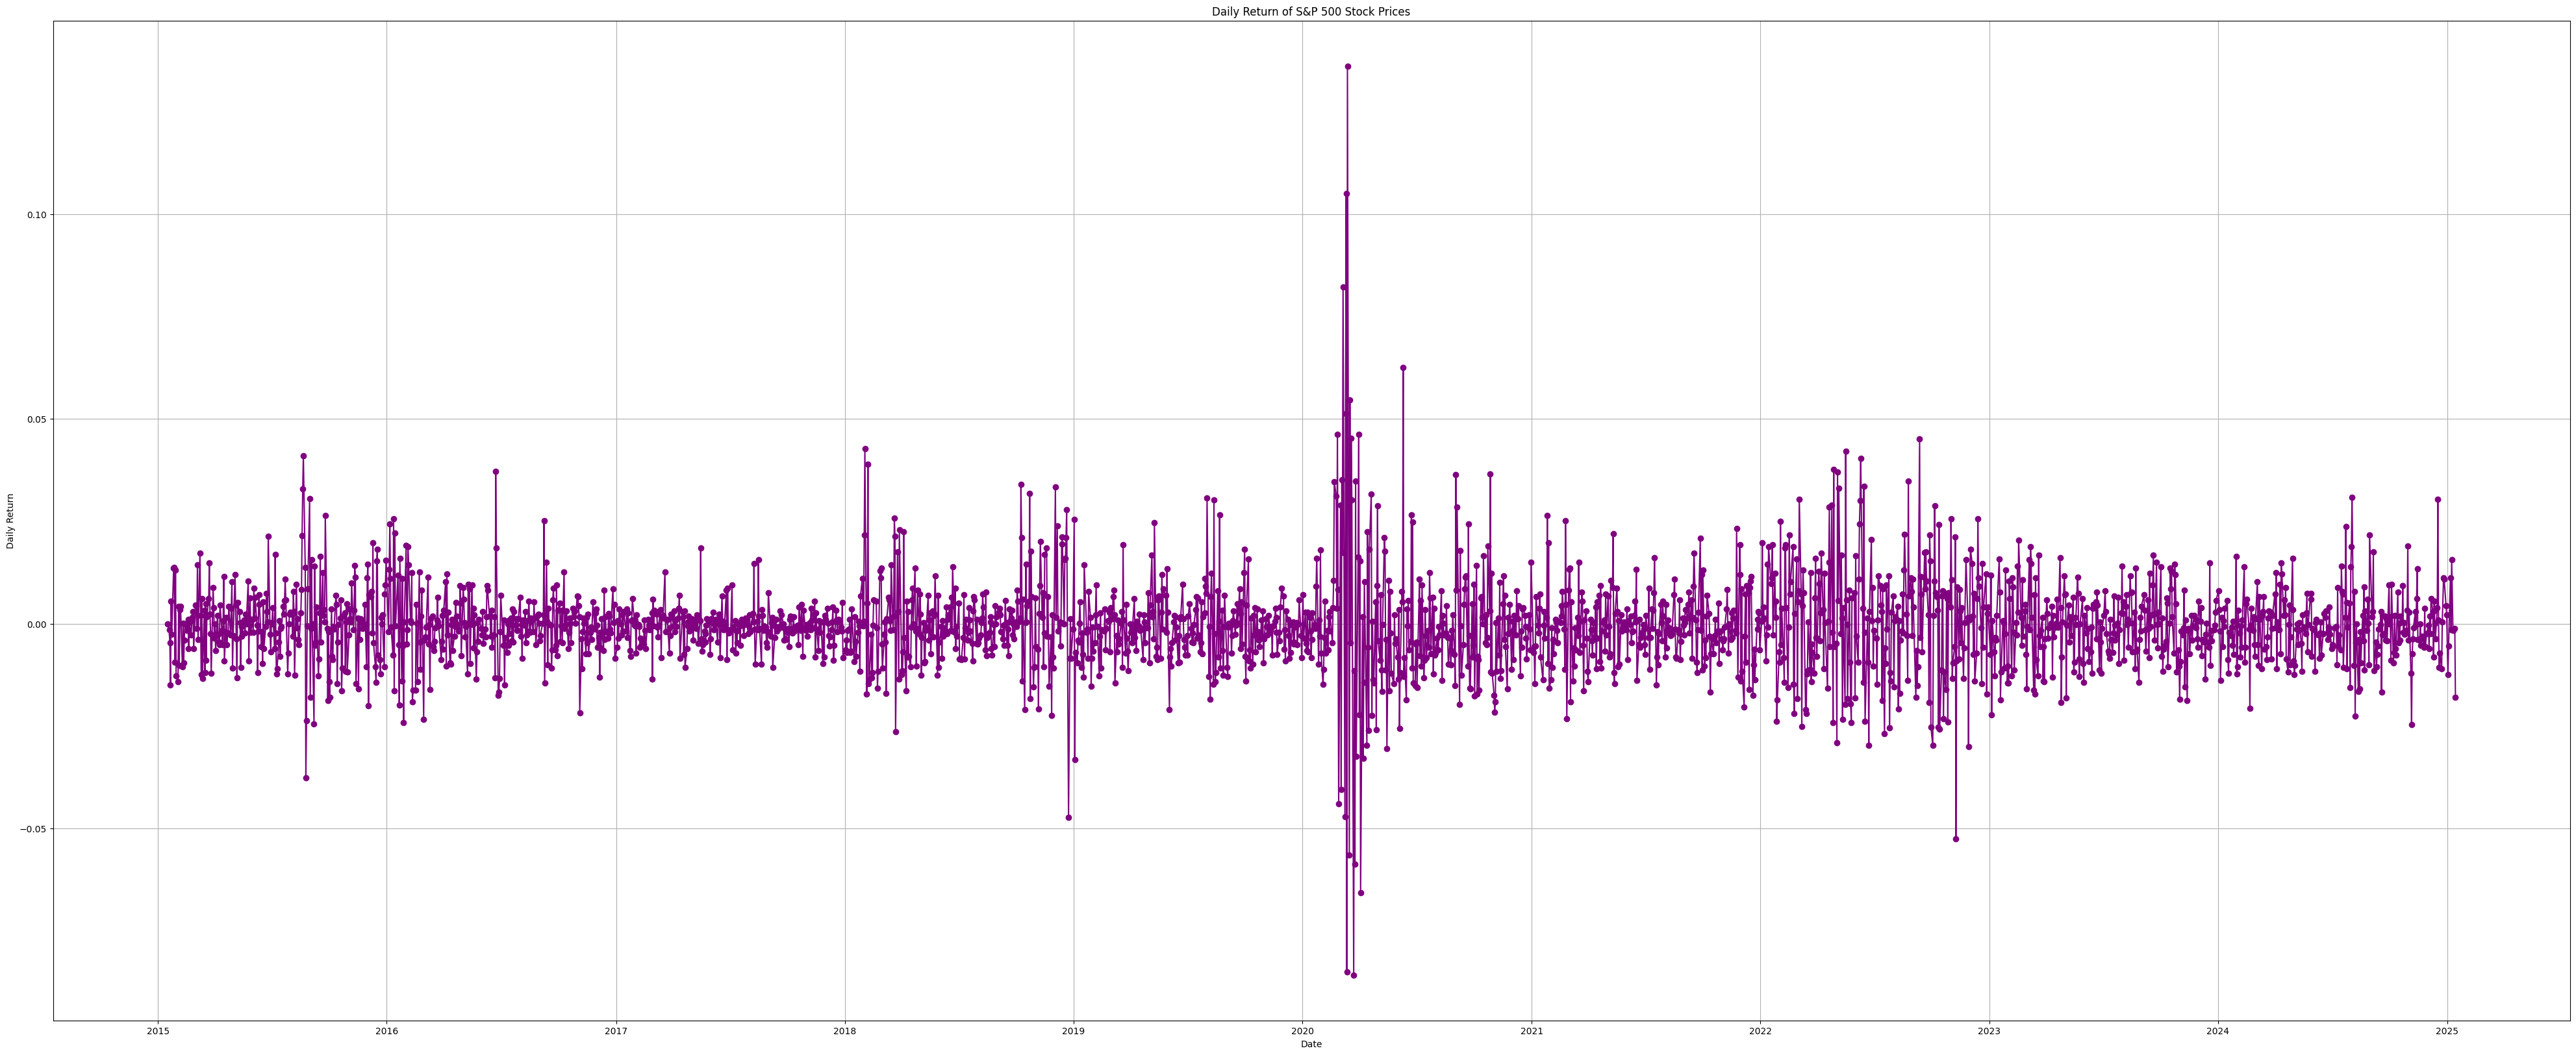

In [101]:
# Menghitung daily return
df['Daily Return'] = df['Close/Last'].pct_change()

# Plot daily return
plt.figure(figsize=(50, 20))
plt.plot(df['Date'], df['Daily Return'], marker='o', color='purple')
plt.title('Daily Return of S&P 500 Stock Prices')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid()
plt.show()

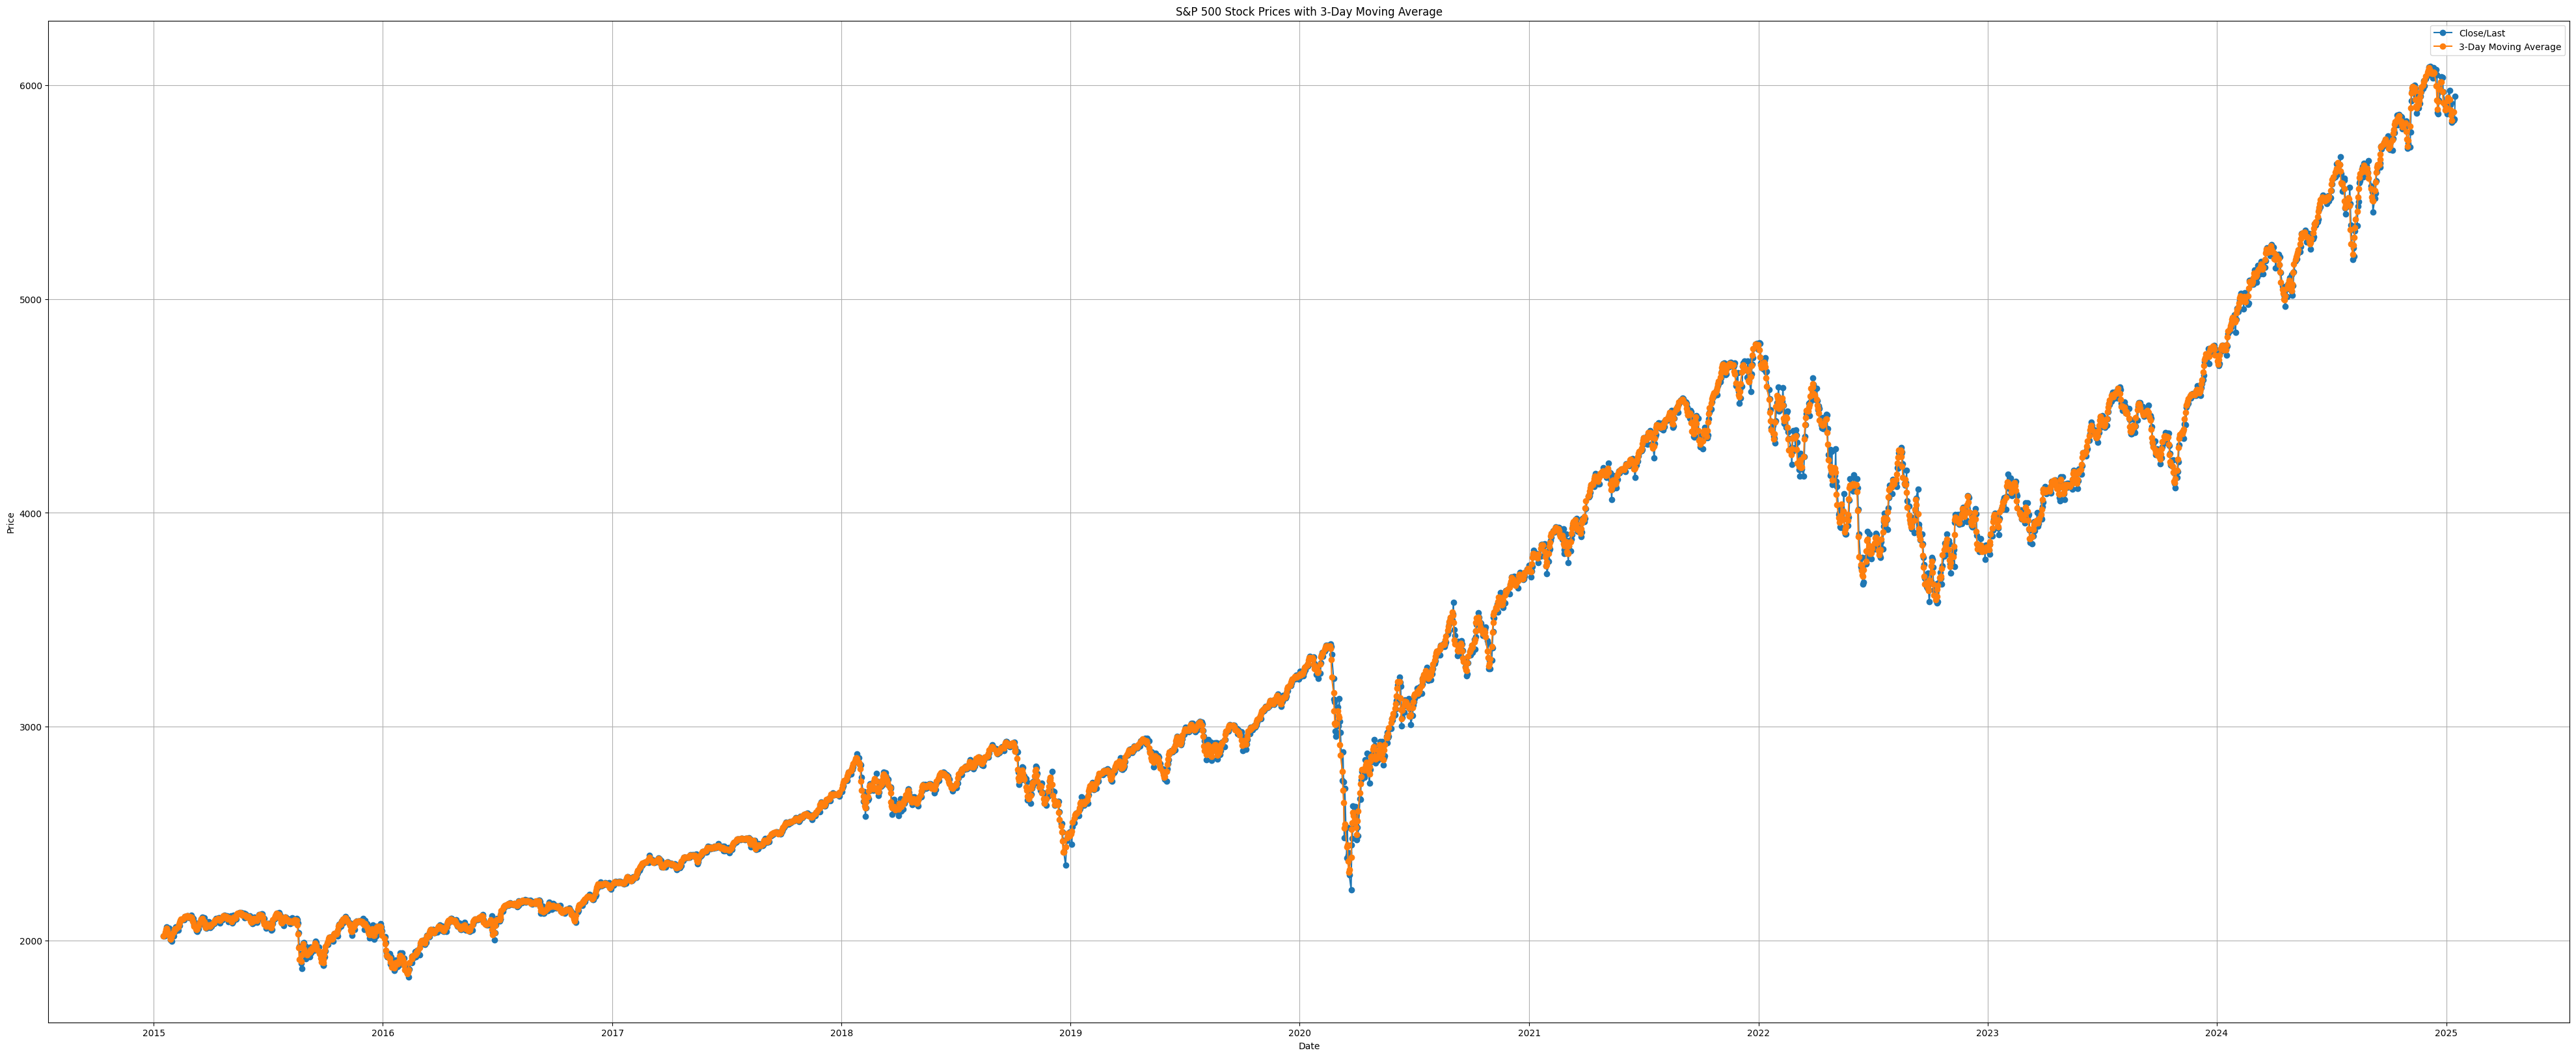

In [102]:
# Menghitung 3-day moving average
df['3-Day MA'] = df['Close/Last'].rolling(window=3).mean()

# Plot harga penutupan dan moving average
plt.figure(figsize=(50, 20))
plt.plot(df['Date'], df['Close/Last'], marker='o', label='Close/Last')
plt.plot(df['Date'], df['3-Day MA'], marker='o', label='3-Day Moving Average')
plt.title('S&P 500 Stock Prices with 3-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

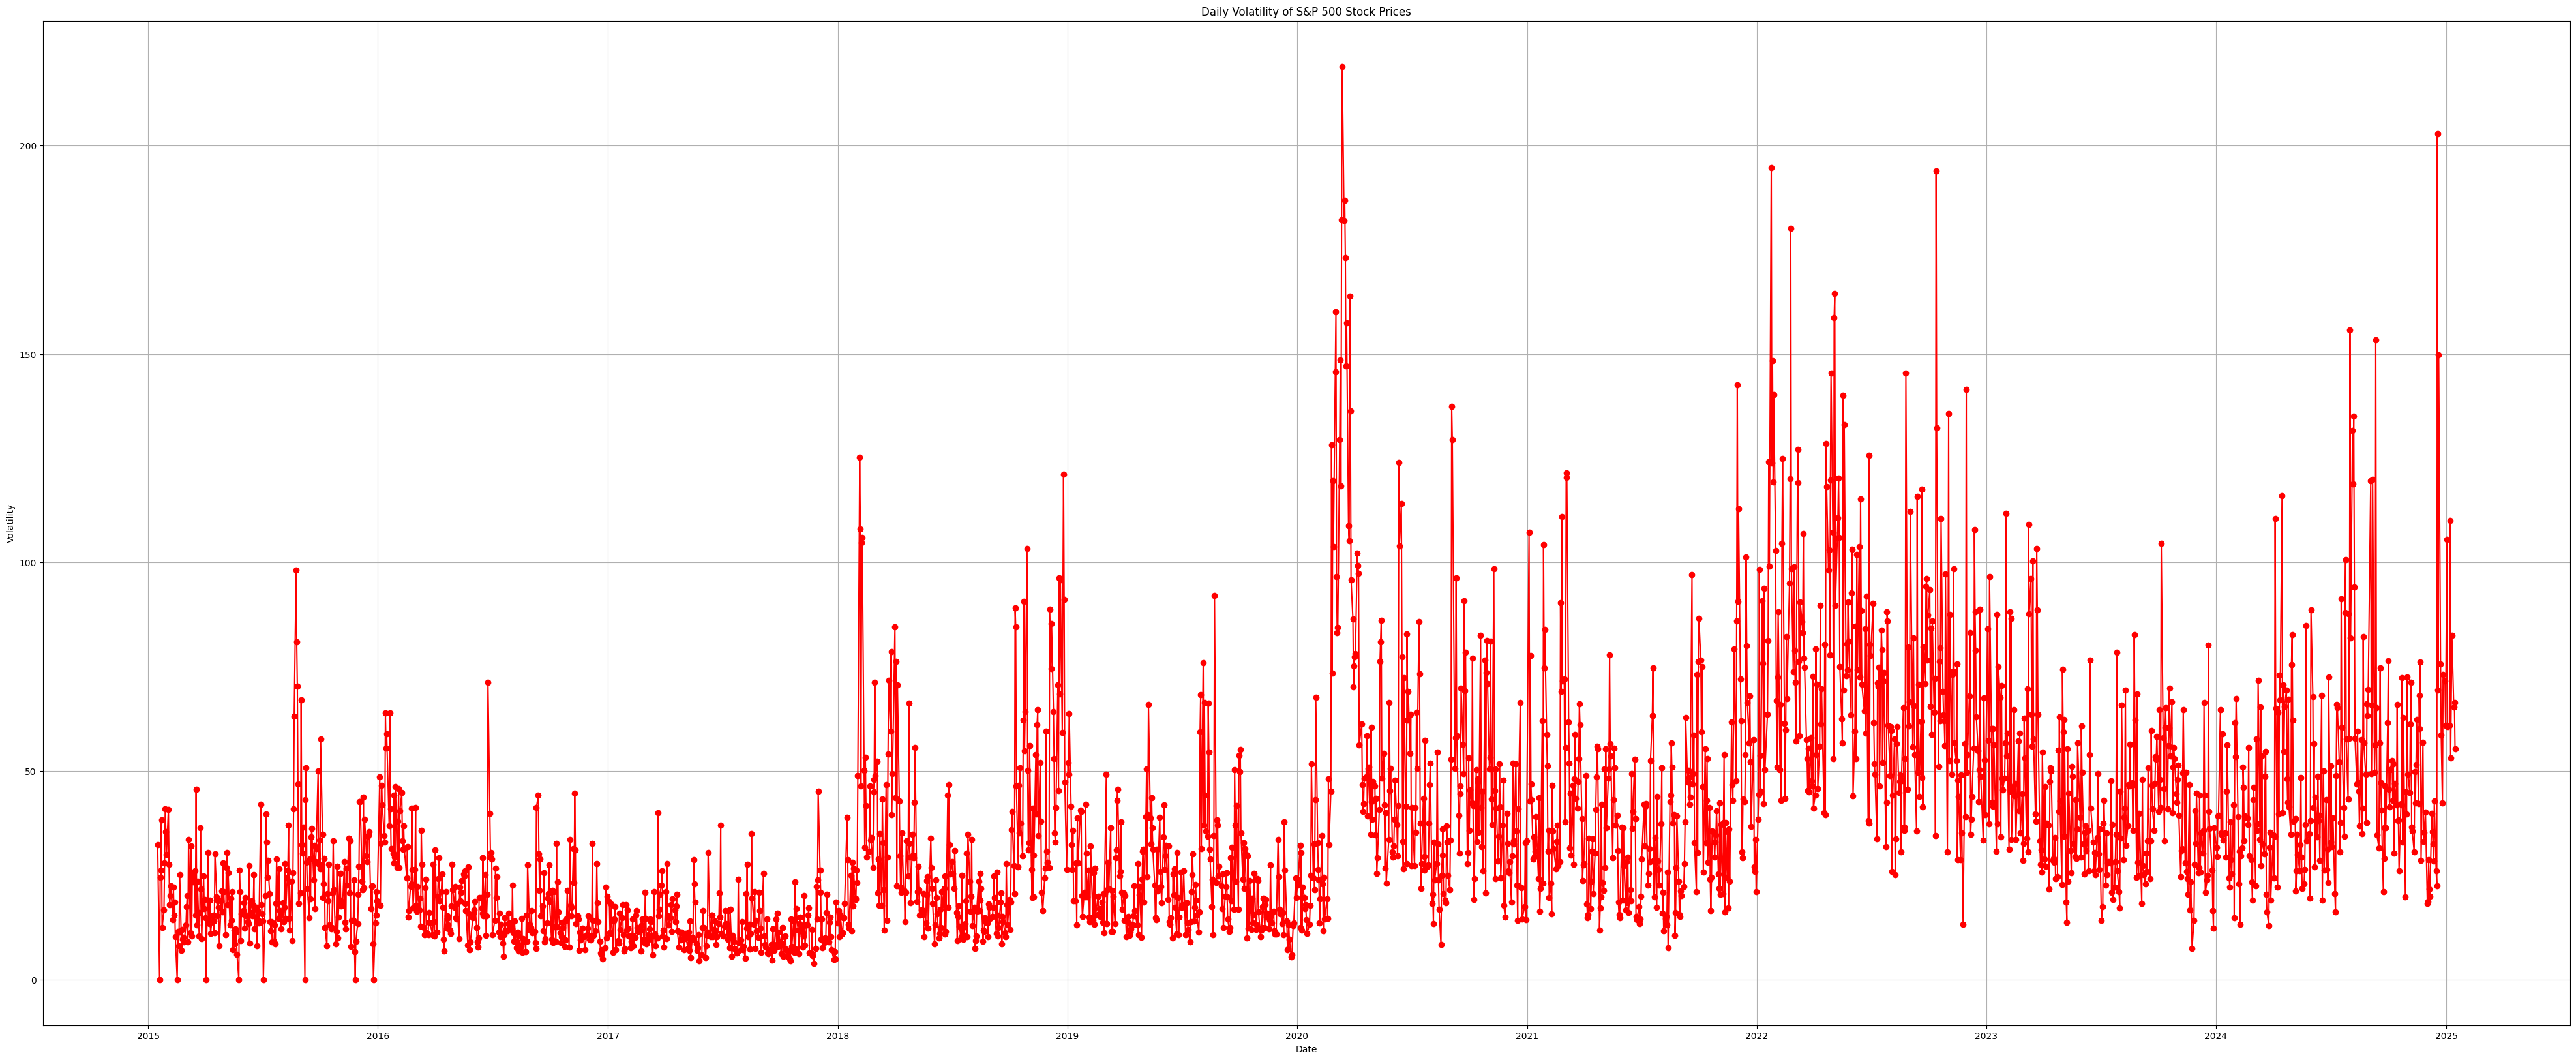

In [103]:
# Menghitung volatilitas harian
df['Daily Volatility'] = df['High'] - df['Low']

# Plot volatilitas harian
plt.figure(figsize=(50, 20))
plt.plot(df['Date'], df['Daily Volatility'], marker='o', color='red')
plt.title('Daily Volatility of S&P 500 Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.show()

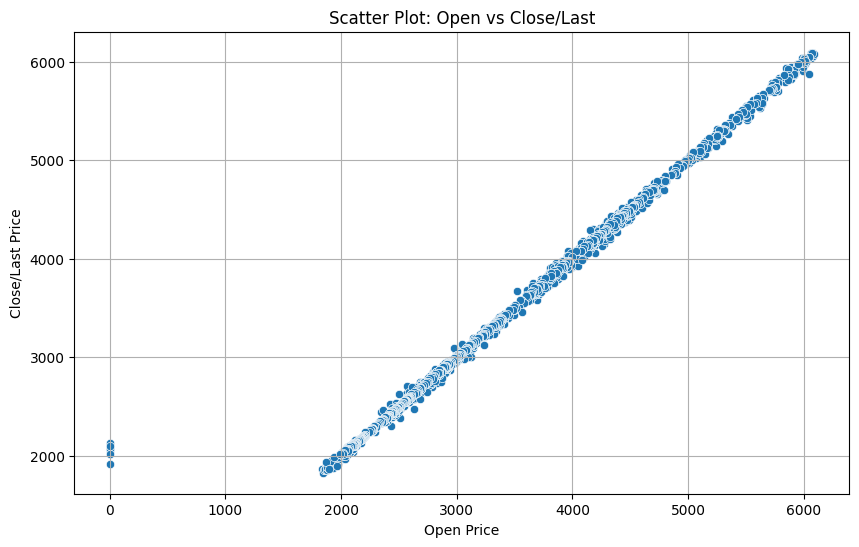

In [104]:
# Scatter plot antara Open dan Close/Last
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Open'], y=df['Close/Last'])
plt.title('Scatter Plot: Open vs Close/Last')
plt.xlabel('Open Price')
plt.ylabel('Close/Last Price')
plt.grid()
plt.show()

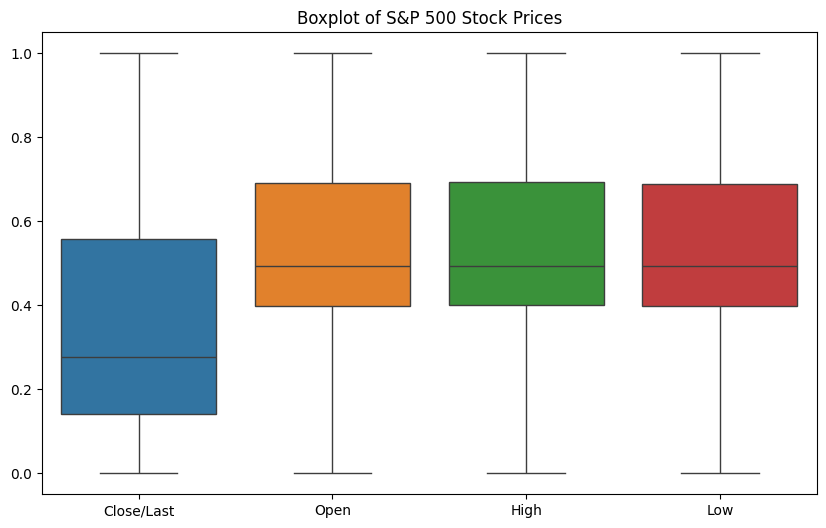

In [33]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Close/Last', 'Open', 'High', 'Low']])
plt.title('Boxplot of S&P 500 Stock Prices')
plt.show()

# Jika ada outlier, kita bisa menghapus atau mengubahnya
# Contoh: Menggunakan IQR untuk menghapus outlier
# Q1 = df['Close/Last'].quantile(0.25)
# Q3 = df['Close/Last'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df['Close/Last'] < (Q1 - 1.5 * IQR)) | (df['Close/Last'] > (Q3 + 1.5 * IQR)))]

In [105]:
# Menambahkan kolom bulan, hari, dan tahun
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

# Menampilkan data dengan kolom baru
print("\nData dengan Kolom Baru (Month, Day, Year):")
print(df[['Date', 'Month', 'Day', 'Year']].head())


Data dengan Kolom Baru (Month, Day, Year):
        Date  Month  Day  Year
0 2025-01-15      1   15  2025
1 2025-01-14      1   14  2025
2 2025-01-13      1   13  2025
3 2025-01-10      1   10  2025
4 2025-01-08      1    8  2025


In [106]:
# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Menghapus baris yang memiliki missing values
df.dropna(inplace=True)

# Memeriksa kembali missing values setelah penghapusan
print("\nMissing Values Setelah Penghapusan:")
print(df.isnull().sum())


Missing Values:
Date                0
Close/Last          0
Open                0
High                0
Low                 0
Daily Return        1
3-Day MA            2
Daily Volatility    0
Month               0
Day                 0
Year                0
dtype: int64

Missing Values Setelah Penghapusan:
Date                0
Close/Last          0
Open                0
High                0
Low                 0
Daily Return        0
3-Day MA            0
Daily Volatility    0
Month               0
Day                 0
Year                0
dtype: int64


In [107]:
# Memeriksa duplikat data
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

# Menghapus duplikat (jika ada)
#df.drop_duplicates(inplace=True)


Jumlah Data Duplikat:
0


In [108]:
# Memeriksa tipe data kolom 'Date'
print("\nTipe Data Kolom 'Date':")
print(df['Date'].dtype)

# Jika belum datetime, konversi ke datetime
if df['Date'].dtype != 'datetime64[ns]':
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


Tipe Data Kolom 'Date':
datetime64[ns]


In [109]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close/Last']].values)

# Membagi data (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [110]:
# Fungsi untuk membuat dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Parameter look_back (misalnya, 3 hari)
look_back = 3

# Membuat dataset untuk training dan testing
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape data untuk LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Membangun model LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(25, activation='relu'))
model_lstm.add(Dense(1))

# Kompilasi model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Ringkasan model
print("Ringkasan Model LSTM:")
model_lstm.summary()

from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model LSTM
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=1,
                              validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

Ringkasan Model LSTM:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 50)             10400     
                                                                 
 dropout_14 (Dropout)        (None, 3, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi menggunakan model LSTM
y_pred_lstm = model_lstm.predict(X_test)

# Menghitung MAE, RMSE, dan R-squared
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

# Menampilkan hasil evaluasi
print("Evaluasi Model LSTM:")
print(f"MAE: {mae_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"R-squared: {r2_lstm:.4f}")

16/16 [==============================] - 2s 3ms/step
Evaluasi Model LSTM:
MAE: 0.0077
RMSE: 0.0105
R-squared: 0.7124


In [113]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Membangun model CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1))

# Kompilasi model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Ringkasan model
print("Ringkasan Model CNN:")
model_cnn.summary()

# Melatih model CNN
history_cnn = model_cnn.fit(X_train, y_train, epochs=100, batch_size=1,
                            validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

Ringkasan Model CNN:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                6450      
                                                                 
 dropout_16 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                 

In [114]:
# Prediksi menggunakan model CNN
y_pred_cnn = model_cnn.predict(X_test)

# Menghitung MAE, RMSE, dan R-squared
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
r2_cnn = r2_score(y_test, y_pred_cnn)

# Menampilkan hasil evaluasi
print("Evaluasi Model CNN:")
print(f"MAE: {mae_cnn:.4f}")
print(f"RMSE: {rmse_cnn:.4f}")
print(f"R-squared: {r2_cnn:.4f}")

16/16 [==============================] - 0s 2ms/step
Evaluasi Model CNN:
MAE: 0.0594
RMSE: 0.0620
R-squared: -9.0803


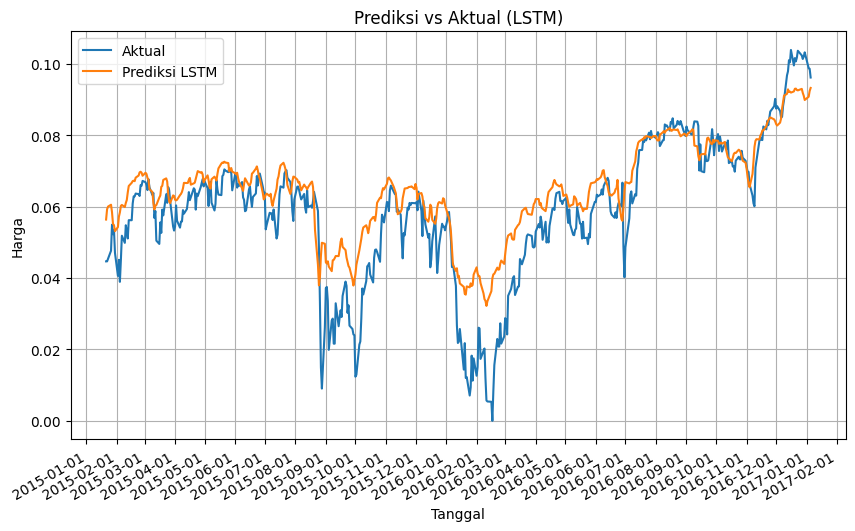

In [119]:
import matplotlib.dates as mdates

# Pastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot prediksi vs aktual dengan tanggal yang realistis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[train_size:train_size + len(y_test)], y_test, label='Aktual')
plt.plot(df['Date'].iloc[train_size:train_size + len(y_test)], y_pred_lstm, label='Prediksi LSTM')
plt.title('Prediksi vs Aktual (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Format sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format tanggal
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Tampilkan label setiap bulan
plt.gcf().autofmt_xdate()  # Rotasi label tanggal agar tidak tumpang tindih

plt.legend()
plt.grid()
plt.show()

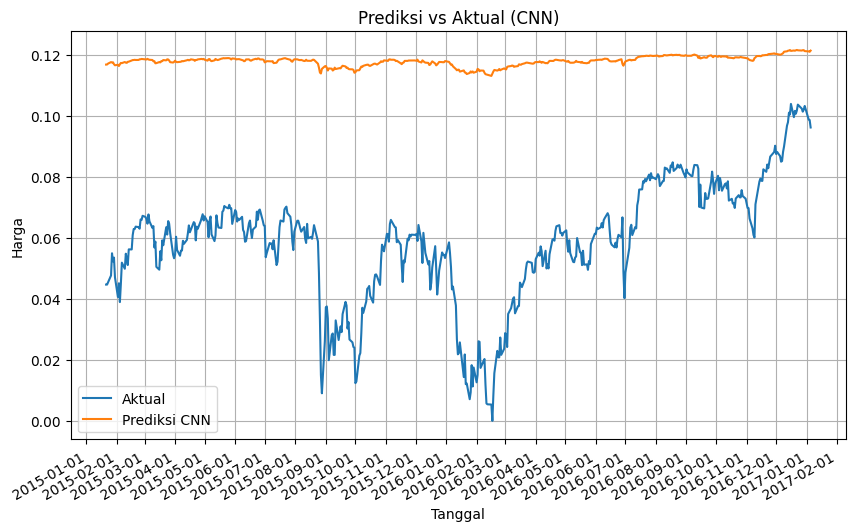

In [120]:
# Plot prediksi vs aktual dengan tanggal yang realistis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[train_size:train_size + len(y_test)], y_test, label='Aktual')
plt.plot(df['Date'].iloc[train_size:train_size + len(y_test)], y_pred_cnn, label='Prediksi CNN')
plt.title('Prediksi vs Aktual (CNN)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Format sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format tanggal
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Tampilkan label setiap bulan
plt.gcf().autofmt_xdate()  # Rotasi label tanggal agar tidak tumpang tindih

plt.legend()
plt.grid()
plt.show()